# Part 1: Loading The Data Into Pandas

First load the data into a pandas DataFrame. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('SeoulBike.csv', low_memory=False)
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
data.shape

(8760, 14)

# Part 2: Data Cleansing and Transformation

### Converting 'Holiday' to Binary

In [4]:
dv_1 = pd.get_dummies(data["Holiday"], dtype=int)
dv_1.rename(columns = {'Holiday': 'Holiday?', 'No Holiday': 'None'}, inplace = True)
dv_1 = dv_1.drop(['None'], axis= 1)
data['Holiday'] = dv_1

### Converting 'Visibility' to Percent

In [5]:
#New Column
data['Visibility%'] = data['Visibility (10m)'] / 2000 * 100

In [6]:
data.shape

(8760, 15)

### Filter only rows won functioning days and drop 'Functional Day' column

In [7]:
data = data[data['Functioning Day'] == 'Yes']
data = data[data['Rented Bike Count']!=0]

#Drop the column 
data = data.drop(columns = "Functioning Day", axis=1)

In [8]:
data.shape

(8465, 14)

### Drop Dew Point Temperature Column

In [9]:
data = data.drop(columns = "Dew point temperature(°C)", axis = 1)

In [10]:
data.shape

(8465, 13)

### Convert Snowfall to Millimeters

In [11]:
data['Snowfall(mm)'] = data['Snowfall (cm)'] * 10

#Drop column- Snowfall (cm)
data = data.drop(axis = 'columns', columns = "Snowfall (cm)")

In [12]:
data.shape

(8465, 13)

In [13]:
data.dtypes

Date                        object
Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Seasons                     object
Holiday                      int64
Visibility%                float64
Snowfall(mm)               float64
dtype: object

### Convert Date from Object to Date/Time

In [14]:
from datetime import date, datetime

In [15]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data.dtypes

Date                       datetime64[ns]
Rented Bike Count                   int64
Hour                                int64
Temperature(°C)                   float64
Humidity(%)                         int64
Wind speed (m/s)                  float64
Visibility (10m)                    int64
Solar Radiation (MJ/m2)           float64
Rainfall(mm)                      float64
Seasons                            object
Holiday                             int64
Visibility%                       float64
Snowfall(mm)                      float64
dtype: object

### Add Hour Format Column from Hour Column. Convert from Int to Date/Time

In [16]:
data['HourFormat'] = pd.to_datetime(data['Hour'], format='%H').dt.strftime('%I:%M %p')

data.dtypes

Date                       datetime64[ns]
Rented Bike Count                   int64
Hour                                int64
Temperature(°C)                   float64
Humidity(%)                         int64
Wind speed (m/s)                  float64
Visibility (10m)                    int64
Solar Radiation (MJ/m2)           float64
Rainfall(mm)                      float64
Seasons                            object
Holiday                             int64
Visibility%                       float64
Snowfall(mm)                      float64
HourFormat                         object
dtype: object

In [17]:
data.head(20)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Visibility%,Snowfall(mm),HourFormat
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.00,0.0,Winter,0,100.00,0.0,12:00 AM
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.00,0.0,Winter,0,100.00,0.0,01:00 AM
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.00,0.0,Winter,0,100.00,0.0,02:00 AM
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.00,0.0,Winter,0,100.00,0.0,03:00 AM
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.00,0.0,Winter,0,100.00,0.0,04:00 AM
5,2017-12-01,100,5,-6.4,37,1.5,2000,0.00,0.0,Winter,0,100.00,0.0,05:00 AM
6,2017-12-01,181,6,-6.6,35,1.3,2000,0.00,0.0,Winter,0,100.00,0.0,06:00 AM
7,2017-12-01,460,7,-7.4,38,0.9,2000,0.00,0.0,Winter,0,100.00,0.0,07:00 AM
8,2017-12-01,930,8,-7.6,37,1.1,2000,0.01,0.0,Winter,0,100.00,0.0,08:00 AM
9,2017-12-01,490,9,-6.5,27,0.5,1928,0.23,0.0,Winter,0,96.40,0.0,09:00 AM


### Create an additional Column for Categorizing the Hours into Times of Day

In [18]:
print(max(data['Hour']))
print(min(data['Hour']))

data['TimeOfDay'] = pd.cut(data['Hour'],
                              bins=[-1, 5, 12, 17, 24],
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                              right=False)

23
0


### Converting Snowfall into Categorical

In [19]:
data['LevelOfSnowfall'] = pd.cut(data['Snowfall(mm)'],
                              bins=[-1, 1, 4, float('inf')],
                              labels=['None','Light',"Heavy"],
                              right=False)

In [20]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Visibility%,Snowfall(mm),HourFormat,TimeOfDay,LevelOfSnowfall
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,0,100.0,0.0,12:00 AM,Night,None
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,0,100.0,0.0,01:00 AM,Night,None
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,0,100.0,0.0,02:00 AM,Night,None
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,0,100.0,0.0,03:00 AM,Night,None
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,0,100.0,0.0,04:00 AM,Night,None


### Converting Rainfall into Categorical

In [21]:
data['LevelOfRainfall'] = pd.cut(data['Rainfall(mm)'],
                              bins=[-1, 1, 5, 10, float('inf')],
                              labels=['None','Light',"Moderate","Heavy"],
                              right=False)

In [22]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Visibility%,Snowfall(mm),HourFormat,TimeOfDay,LevelOfSnowfall,LevelOfRainfall
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,0,100.0,0.0,12:00 AM,Night,None,None
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,0,100.0,0.0,01:00 AM,Night,None,None
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,0,100.0,0.0,02:00 AM,Night,None,None
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,0,100.0,0.0,03:00 AM,Night,None,None
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,0,100.0,0.0,04:00 AM,Night,None,None


### Converting Visibility% into Categorical

In [23]:
data['LevelOfVisibility'] = pd.cut(data['Visibility%'],
                              bins=[-100, 40, 75,float("inf")],
                              labels=['Low','Moderate','High'],
                              right=False)

In [24]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Visibility%,Snowfall(mm),HourFormat,TimeOfDay,LevelOfSnowfall,LevelOfRainfall,LevelOfVisibility
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,0,100.0,0.0,12:00 AM,Night,None,None,High
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,0,100.0,0.0,01:00 AM,Night,None,None,High
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,0,100.0,0.0,02:00 AM,Night,None,None,High
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,0,100.0,0.0,03:00 AM,Night,None,None,High
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,0,100.0,0.0,04:00 AM,Night,None,None,High


In [25]:
data.dtypes

Date                       datetime64[ns]
Rented Bike Count                   int64
Hour                                int64
Temperature(°C)                   float64
Humidity(%)                         int64
Wind speed (m/s)                  float64
Visibility (10m)                    int64
Solar Radiation (MJ/m2)           float64
Rainfall(mm)                      float64
Seasons                            object
Holiday                             int64
Visibility%                       float64
Snowfall(mm)                      float64
HourFormat                         object
TimeOfDay                        category
LevelOfSnowfall                  category
LevelOfRainfall                  category
LevelOfVisibility                category
dtype: object

### Creating Day of Week Column

In [26]:
data['DayOfWeek'] = data['Date'].dt.day_name()

### Create Weekend Binary Column

In [27]:
data['Weekend?'] = data['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

In [28]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Visibility%,Snowfall(mm),HourFormat,TimeOfDay,LevelOfSnowfall,LevelOfRainfall,LevelOfVisibility,DayOfWeek,Weekend?
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,0,100.0,0.0,12:00 AM,Night,None,None,High,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,0,100.0,0.0,01:00 AM,Night,None,None,High,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,0,100.0,0.0,02:00 AM,Night,None,None,High,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,0,100.0,0.0,03:00 AM,Night,None,None,High,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,0,100.0,0.0,04:00 AM,Night,None,None,High,Friday,0


# Part 3: Descriptive Statistics

In [29]:
data.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Holiday,Visibility%,Snowfall(mm),Weekend?
count,8465,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000,8465.000000
mean,2018-05-28 09:14:23.744831744,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,0.567868,0.14912,0.048198,71.693674,0.776846,0.288364
min,2017-12-01 00:00:00,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.00000,0.000000,1.350000,0.000000,0.000000
25%,2018-02-27 00:00:00,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,0.000000,0.00000,0.000000,46.750000,0.000000,0.000000
50%,2018-05-28 00:00:00,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,0.010000,0.00000,0.000000,84.500000,0.000000,0.000000
75%,2018-08-24 00:00:00,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,0.930000,0.00000,0.000000,100.000000,0.000000,1.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.00000,1.000000,100.000000,88.000000,1.000000
std,NaN,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,0.868245,1.12554,0.214198,30.452561,4.440633,0.453028


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8465 non-null   datetime64[ns]
 1   Rented Bike Count        8465 non-null   int64         
 2   Hour                     8465 non-null   int64         
 3   Temperature(°C)          8465 non-null   float64       
 4   Humidity(%)              8465 non-null   int64         
 5   Wind speed (m/s)         8465 non-null   float64       
 6   Visibility (10m)         8465 non-null   int64         
 7   Solar Radiation (MJ/m2)  8465 non-null   float64       
 8   Rainfall(mm)             8465 non-null   float64       
 9   Seasons                  8465 non-null   object        
 10  Holiday                  8465 non-null   int64         
 11  Visibility%              8465 non-null   float64       
 12  Snowfall(mm)             8465 non-null 

# Part 4: Data Visualizations

### Histograms

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

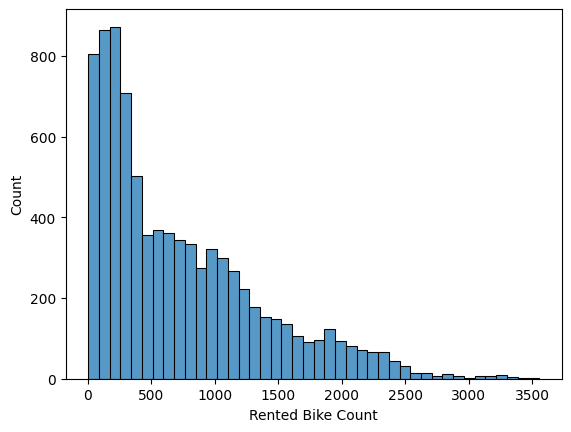

In [31]:
sns.histplot(data["Rented Bike Count"])

Text(0, 0.5, 'Frequency')

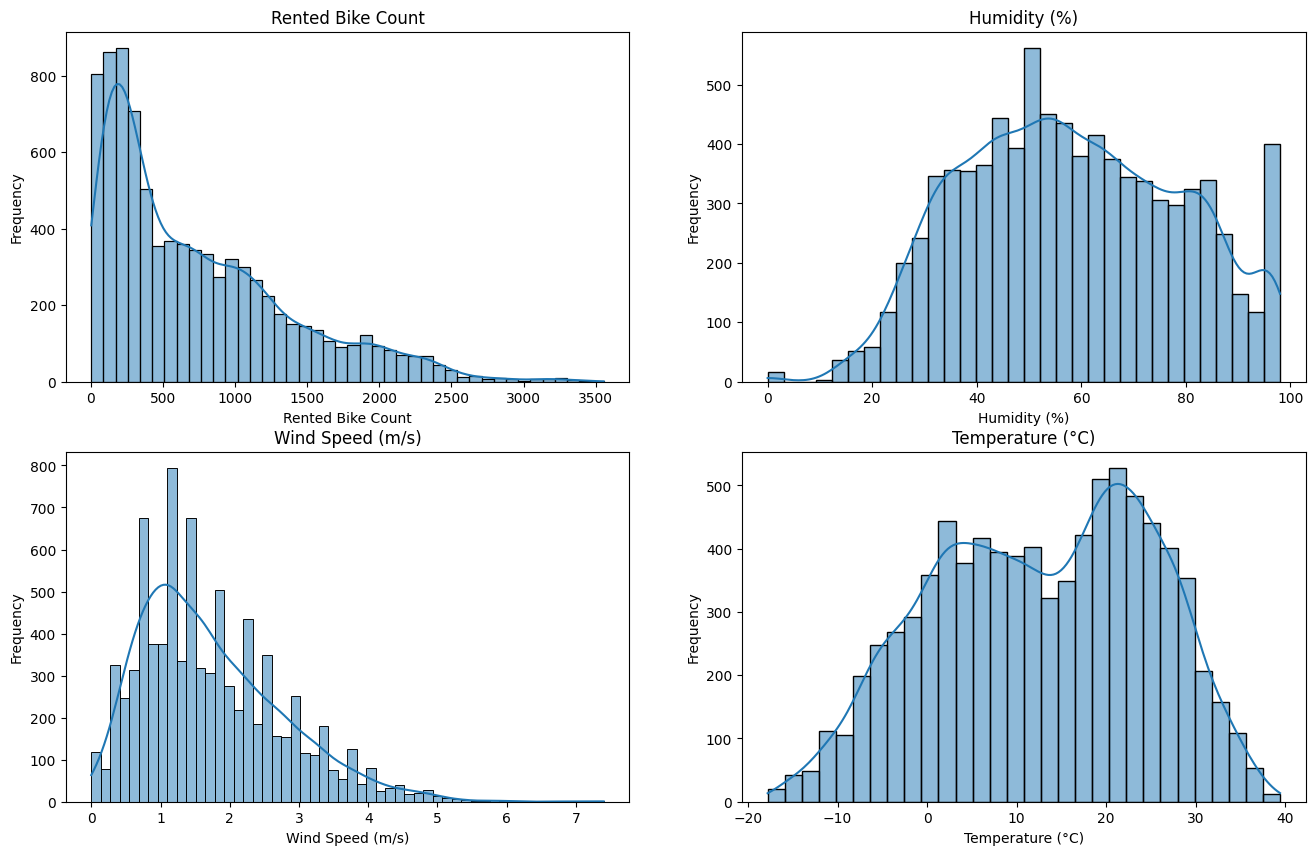

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot the histogram (Rented Bikes Count)
sns.histplot(data["Rented Bike Count"], ax= axes[0][0], kde=True)
axes[0][0].set_title('Rented Bike Count')
axes[0][0].set_xlabel('Rented Bike Count')
axes[0][0].set_ylabel('Frequency')

# Plot the histogram (Humidity)
sns.histplot(data["Humidity(%)"], ax= axes[0][1], kde=True)
axes[0][1].set_title('Humidity (%)')
axes[0][1].set_xlabel('Humidity (%)')
axes[0][1].set_ylabel('Frequency')

# Plot the histogram (Wind speed)
sns.histplot(data["Wind speed (m/s)"], ax= axes[1][0], kde=True)
axes[1][0].set_title('Wind Speed (m/s)')
axes[1][0].set_xlabel('Wind Speed (m/s)')
axes[1][0].set_ylabel('Frequency')

# Plot the histogram (Temperature)
sns.histplot(data["Temperature(°C)"], ax= axes[1][1], kde=True)
axes[1][1].set_title('Temperature (°C)')
axes[1][1].set_xlabel('Temperature (°C)')
axes[1][1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

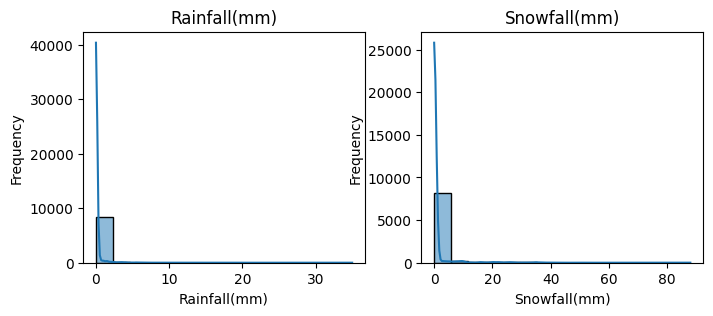

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Plot the histogram (Rainfall(mm))
sns.histplot(data["Rainfall(mm)"], ax= axes[0], kde=True)
axes[0].set_title('Rainfall(mm)')
axes[0].set_xlabel('Rainfall(mm)')
axes[0].set_ylabel('Frequency')

# Plot the histogram (Snowfall(mm))
sns.histplot(data["Snowfall(mm)"], ax= axes[1], kde=True)
axes[1].set_title('Snowfall(mm)')
axes[1].set_xlabel('Snowfall(mm)')
axes[1].set_ylabel('Frequency')



### Bar Plots

Text(0.5, 1.0, 'DayOfWeek')

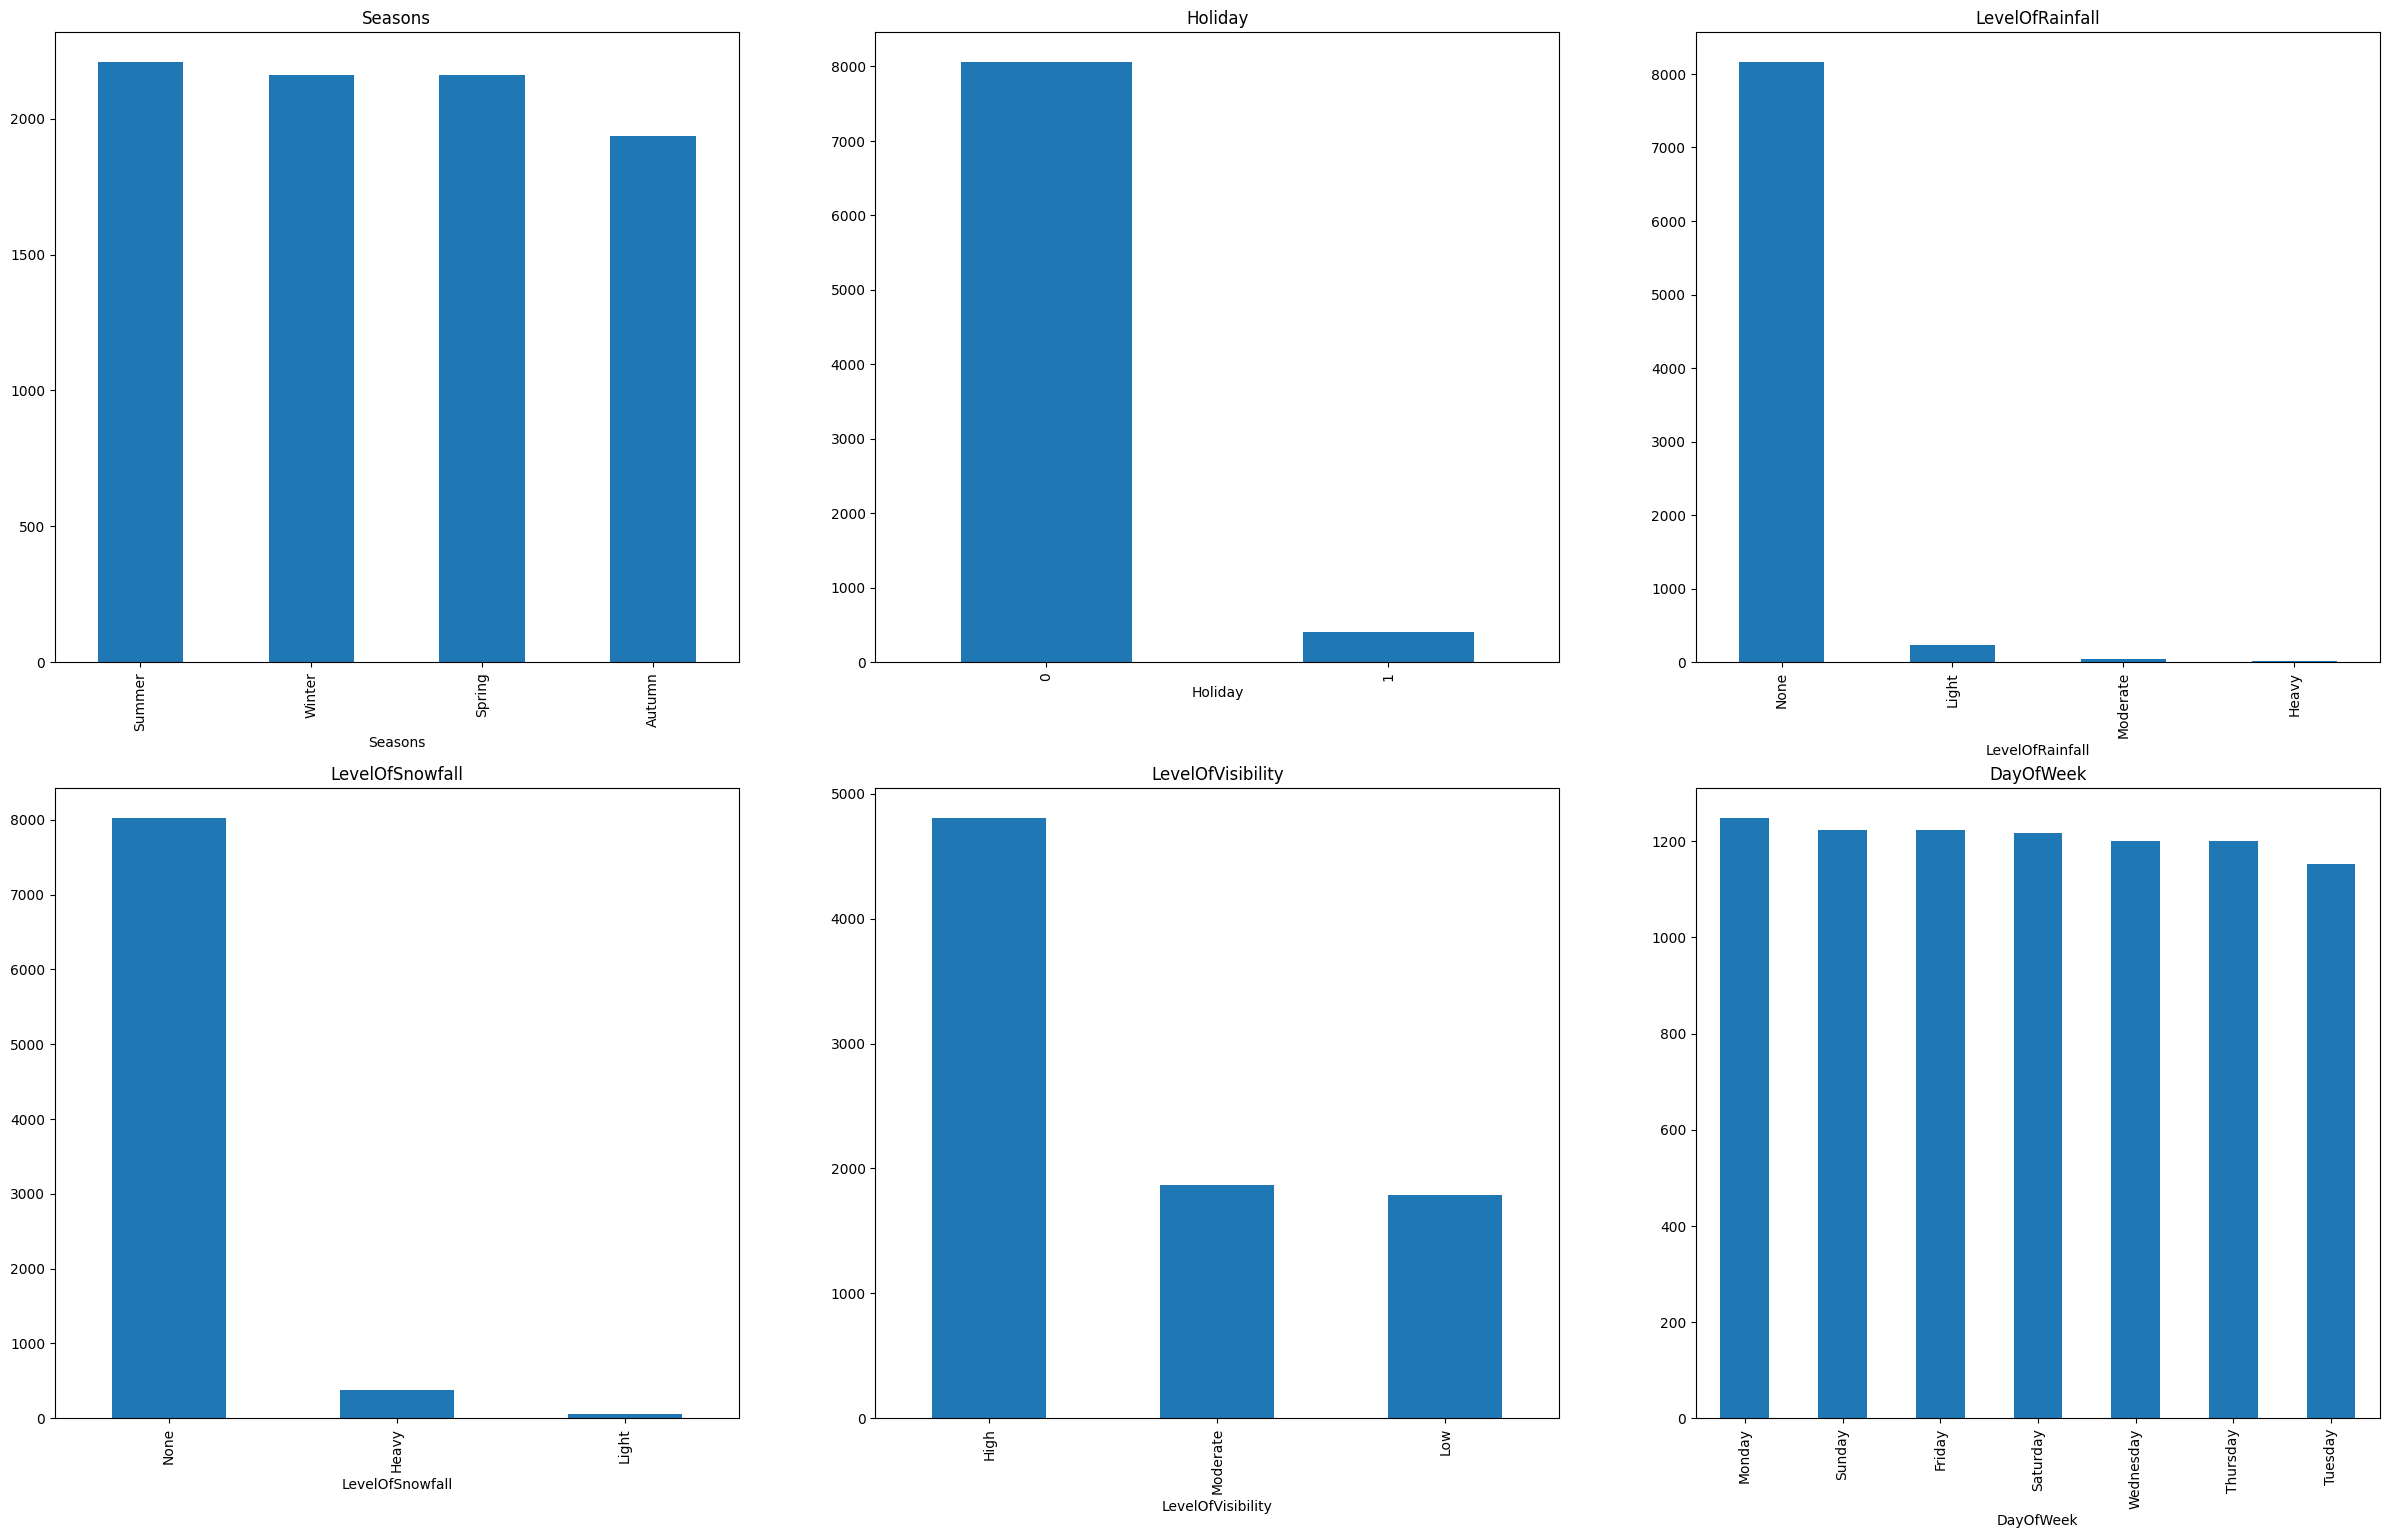

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(30, 18))

# Plot the histogram (Seasons)
data['Seasons'].value_counts().plot(kind='bar', ax=axes[0][0])
axes[0][0].set_title('Seasons')
# axes[0][0].set_xlabel('Seasons')
# axes[0][0].set_ylabel('Frequency')

# Plot the histogram (Holiday)
data['Holiday'].value_counts().plot(kind='bar', ax=axes[0][1])
axes[0][1].set_title('Holiday')
# axes[0][1].set_xlabel('Holiday')
# axes[0][1].set_ylabel('Frequency')

# Plot the histogram (LevelOfRainfall)
data['LevelOfRainfall'].value_counts().plot(kind='bar', ax=axes[0][2])
axes[0][2].set_title('LevelOfRainfall')
# axes[0][2].set_xlabel('LevelOfRainfall')
# axes[0][2].set_ylabel('Frequency')

# Plot the histogram (LevelOfSnowfall)
data['LevelOfSnowfall'].value_counts().plot(kind='bar', ax=axes[1][0])
axes[1][0].set_title('LevelOfSnowfall')
# axes[1][0].set_xlabel('LevelOfSnowfall')
# axes[1][0].set_ylabel('Frequency')

# Plot the histogram (LevelOfVisibility)
data['LevelOfVisibility'].value_counts().plot(kind='bar', ax=axes[1][1])
axes[1][1].set_title('LevelOfVisibility')
# axes[1][1].set_xlabel('LevelOfVisibility')
# axes[1][1].set_ylabel('Frequency')

# Plot the histogram (DayOfWeek)
data['DayOfWeek'].value_counts().plot(kind='bar', ax=axes[1][2])
axes[1][2].set_title('DayOfWeek')
# axes[1][2].set_xlabel('DayOfWeek')
# axes[1][2].set_ylabel('Frequency')


### Box and Whisker Charts

{'whiskers': [<matplotlib.lines.Line2D at 0x18e234bce60>,
 'caps': [<matplotlib.lines.Line2D at 0x18e234a0860>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e234d3dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x18e23522c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e23522f30>],
 'means': []}

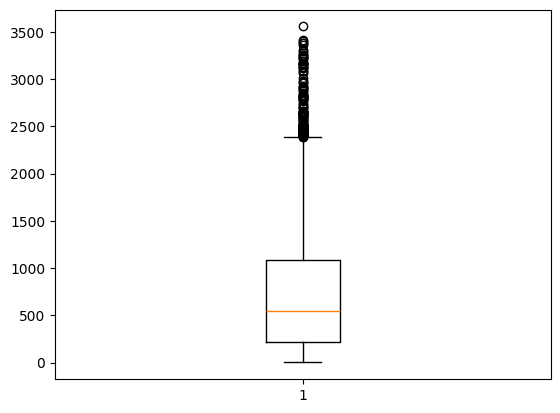

In [35]:
plt.boxplot(data["Rented Bike Count"], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x18e235a8b90>,
 'caps': [<matplotlib.lines.Line2D at 0x18e235a90d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e235a88f0>],
 'medians': [<matplotlib.lines.Line2D at 0x18e235a9550>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e235a97f0>],
 'means': []}

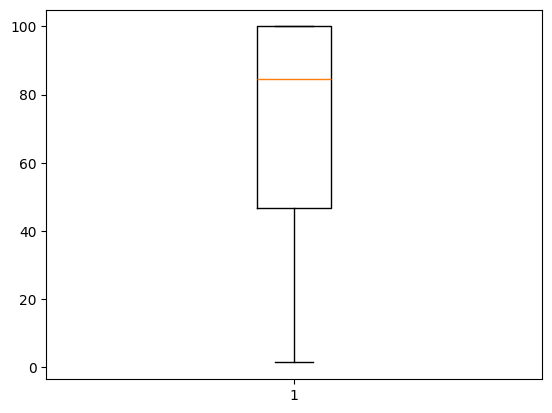

In [36]:
plt.boxplot(data["Visibility%"], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x18e235f29f0>,
 'caps': [<matplotlib.lines.Line2D at 0x18e235f2f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e235f28a0>],
 'medians': [<matplotlib.lines.Line2D at 0x18e235f34a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e235f3680>],
 'means': []}

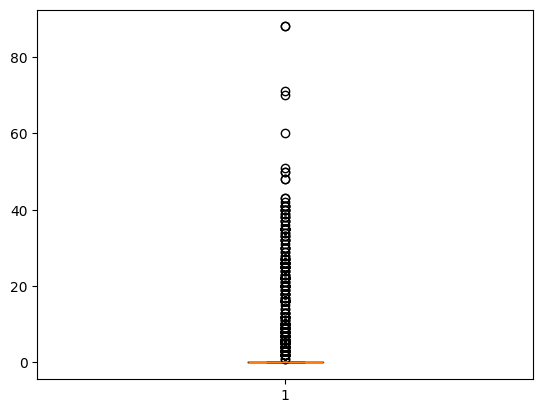

In [37]:
plt.boxplot(data["Snowfall(mm)"], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x18e2363f860>,
 'caps': [<matplotlib.lines.Line2D at 0x18e2363fda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e2363f590>],
 'medians': [<matplotlib.lines.Line2D at 0x18e236782c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e23678560>],
 'means': []}

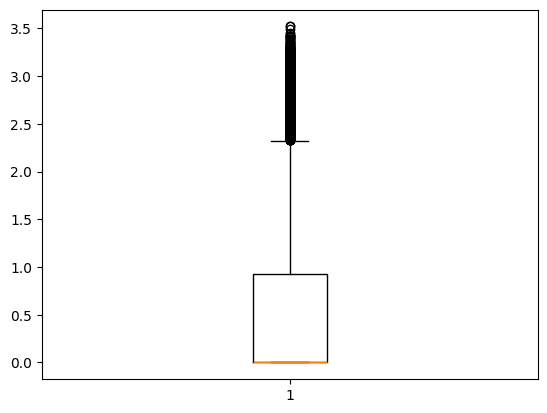

In [38]:
plt.boxplot(data["Solar Radiation (MJ/m2)"], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x18e236ba9c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18e236bad80>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e236ba720>],
 'medians': [<matplotlib.lines.Line2D at 0x18e236bb2c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e236bb590>],
 'means': []}

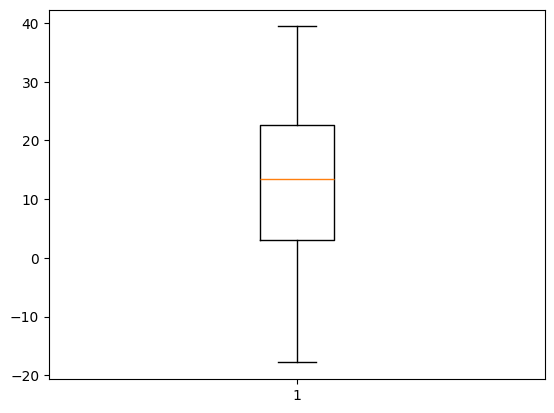

In [39]:
plt.boxplot(data["Temperature(°C)"], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x18e23738cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x18e23739250>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e236ebdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x18e237396d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e23739970>],
 'means': []}

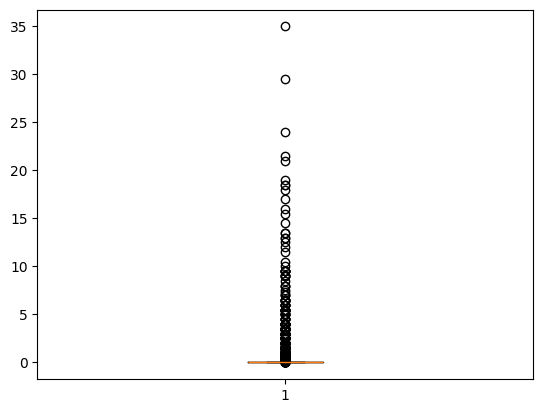

In [40]:
plt.boxplot(data["Rainfall(mm)"], notch=None, vert=None, patch_artist=None, widths=None)

### Histograms by Group

C:\Users\akshi\AppData\Local\Temp\ipykernel_26412\2945458609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data["Rented Bike Count"].hist(by = data["TimeOfDay"])


array([[<Axes: title={'center': 'Night'}>,
        <Axes: title={'center': 'Morning'}>],
       [<Axes: title={'center': 'Afternoon'}>,
        <Axes: title={'center': 'Evening'}>]], dtype=object)

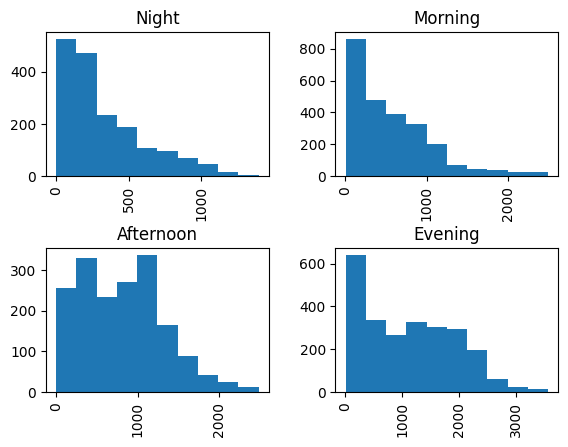

In [41]:
data["Rented Bike Count"].hist(by = data["TimeOfDay"])

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

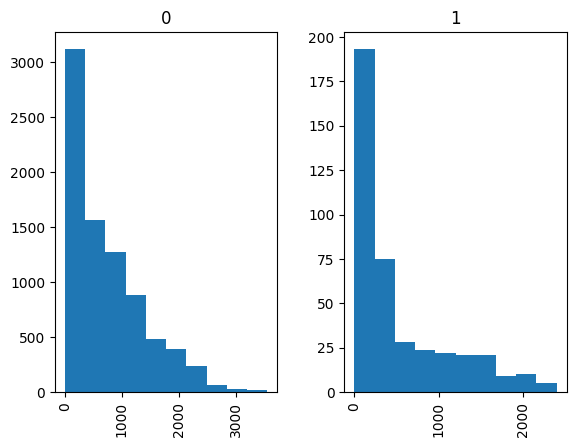

In [42]:
data["Rented Bike Count"].hist(by = data["Holiday"])

array([[<Axes: title={'center': 'Friday'}>,
        <Axes: title={'center': 'Monday'}>,
        <Axes: title={'center': 'Saturday'}>],
       [<Axes: title={'center': 'Sunday'}>,
        <Axes: title={'center': 'Thursday'}>,
        <Axes: title={'center': 'Tuesday'}>],
       [<Axes: title={'center': 'Wednesday'}>, <Axes: >, <Axes: >]],
      dtype=object)

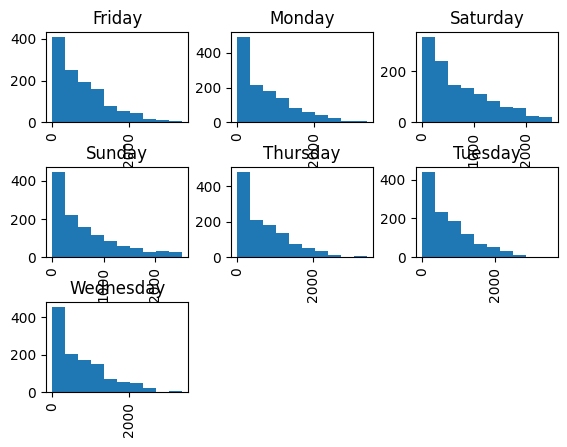

In [43]:
data["Rented Bike Count"].hist(by = data["DayOfWeek"])

array([[<Axes: title={'center': 'Autumn'}>,
        <Axes: title={'center': 'Spring'}>],
       [<Axes: title={'center': 'Summer'}>,
        <Axes: title={'center': 'Winter'}>]], dtype=object)

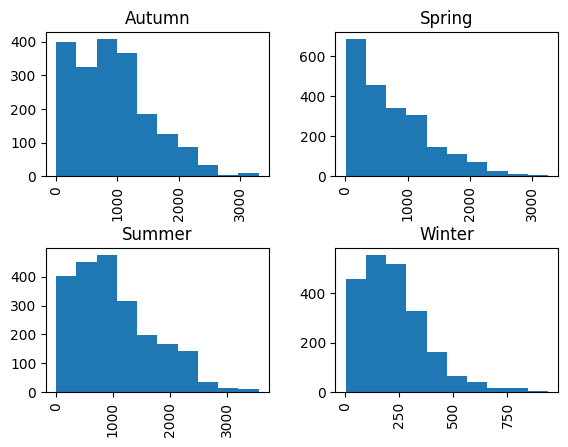

In [44]:
data["Rented Bike Count"].hist(by = data["Seasons"])

C:\Users\akshi\AppData\Local\Temp\ipykernel_26412\3125879805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data["Rented Bike Count"].hist(by = data["LevelOfSnowfall"])


array([[<Axes: title={'center': 'None'}>,
        <Axes: title={'center': 'Light'}>],
       [<Axes: title={'center': 'Heavy'}>, <Axes: >]], dtype=object)

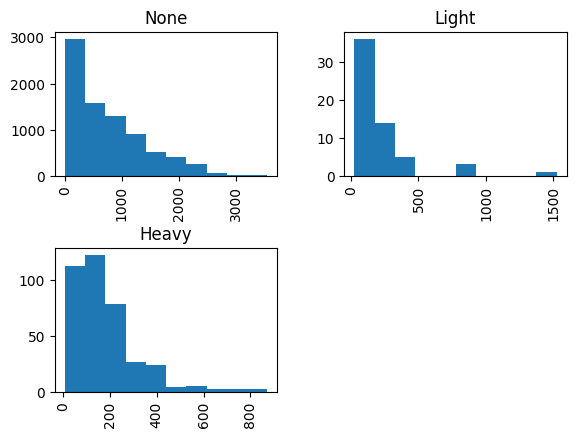

In [45]:
data["Rented Bike Count"].hist(by = data["LevelOfSnowfall"])

C:\Users\akshi\AppData\Local\Temp\ipykernel_26412\375698187.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data["Rented Bike Count"].hist(by = data["LevelOfRainfall"])


array([[<Axes: title={'center': 'None'}>,
        <Axes: title={'center': 'Light'}>],
       [<Axes: title={'center': 'Moderate'}>,
        <Axes: title={'center': 'Heavy'}>]], dtype=object)

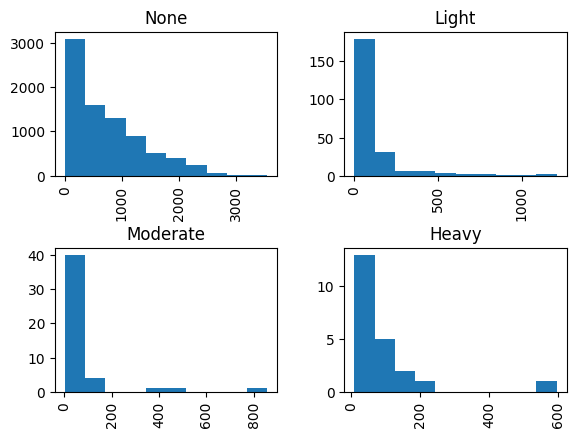

In [46]:
data["Rented Bike Count"].hist(by = data["LevelOfRainfall"])

C:\Users\akshi\AppData\Local\Temp\ipykernel_26412\2055974188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data["Rented Bike Count"].hist(by = data["LevelOfVisibility"])


array([[<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Moderate'}>],
       [<Axes: title={'center': 'High'}>, <Axes: >]], dtype=object)

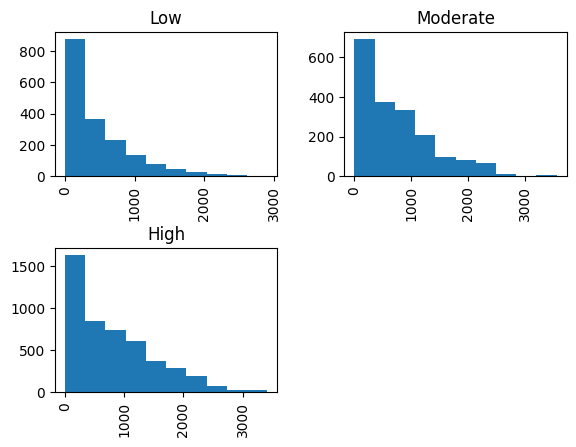

In [47]:
data["Rented Bike Count"].hist(by = data["LevelOfVisibility"])

### Box Plots by Group

<Axes: xlabel='TimeOfDay', ylabel='Rented Bike Count'>

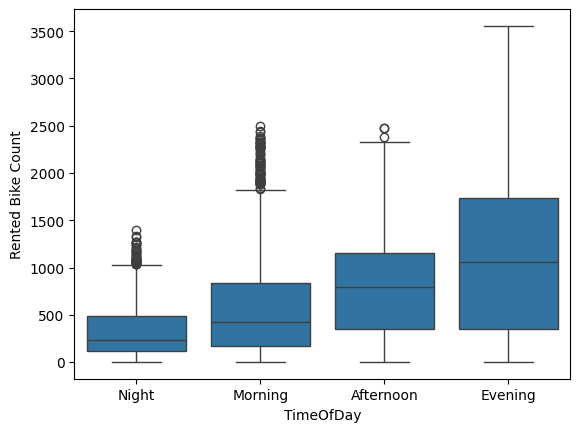

In [48]:
sns.boxplot(x=data['TimeOfDay'], y=data['Rented Bike Count'], data=data)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

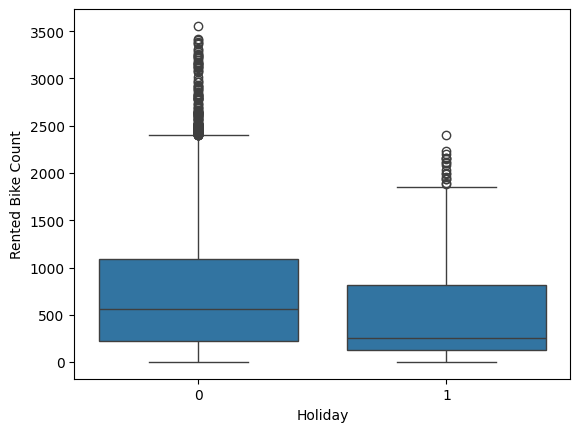

In [49]:
sns.boxplot(x=data['Holiday'], y=data['Rented Bike Count'], data=data)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

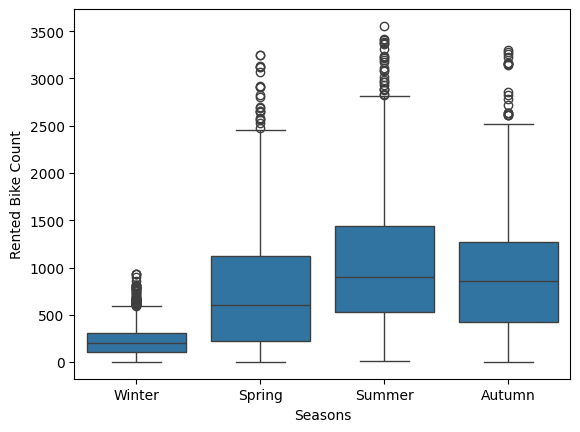

In [50]:
sns.boxplot(x=data['Seasons'], y=data['Rented Bike Count'], data=data)

<Axes: xlabel='LevelOfSnowfall', ylabel='Rented Bike Count'>

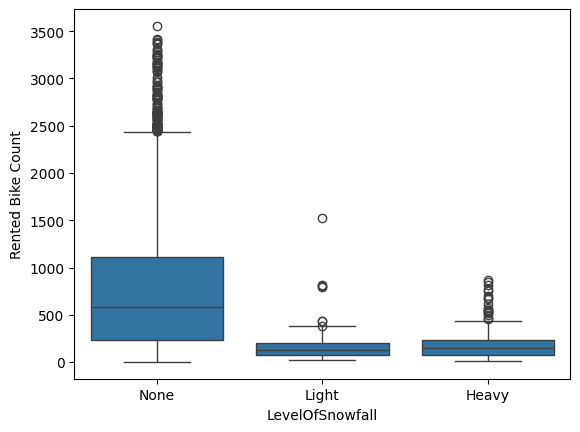

In [51]:
sns.boxplot(x=data['LevelOfSnowfall'], y=data['Rented Bike Count'], data=data)

<Axes: xlabel='LevelOfRainfall', ylabel='Rented Bike Count'>

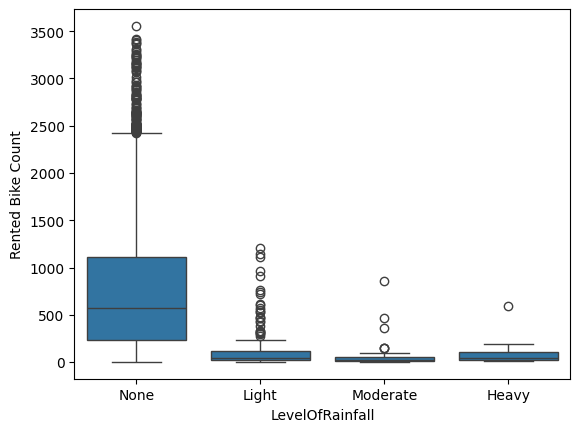

In [52]:
sns.boxplot(x=data['LevelOfRainfall'], y=data['Rented Bike Count'], data=data)

<Axes: xlabel='LevelOfVisibility', ylabel='Rented Bike Count'>

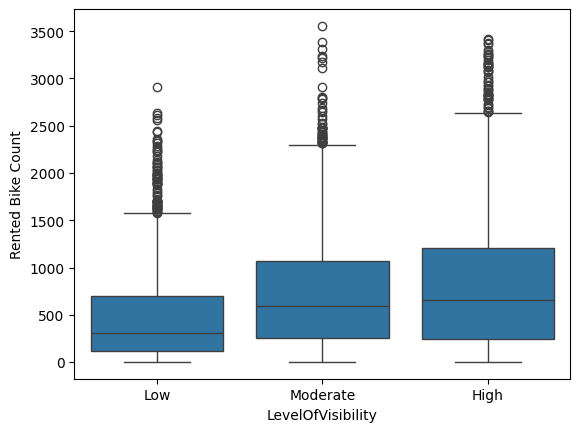

In [53]:
sns.boxplot(x=data['LevelOfVisibility'], y=data['Rented Bike Count'], data=data)

<Axes: xlabel='DayOfWeek', ylabel='Rented Bike Count'>

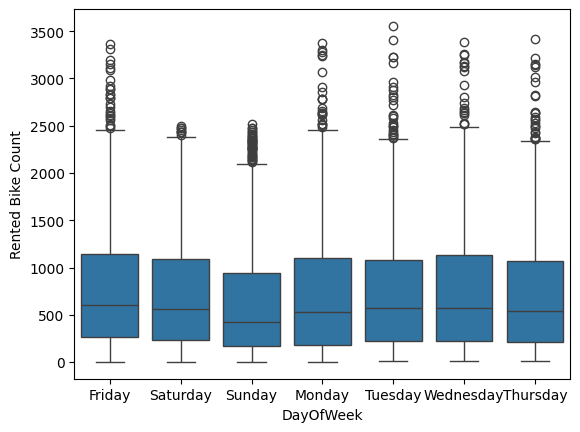

In [54]:
sns.boxplot(x=data['DayOfWeek'], y=data['Rented Bike Count'], data=data)

<Axes: xlabel='Rented Bike Count', ylabel='TimeOfDay'>

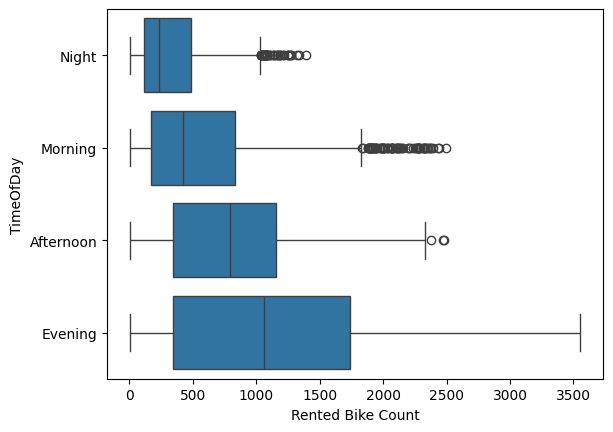

In [55]:
sns.boxplot(x = data['Rented Bike Count'], y = data['TimeOfDay'])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8465 non-null   datetime64[ns]
 1   Rented Bike Count        8465 non-null   int64         
 2   Hour                     8465 non-null   int64         
 3   Temperature(°C)          8465 non-null   float64       
 4   Humidity(%)              8465 non-null   int64         
 5   Wind speed (m/s)         8465 non-null   float64       
 6   Visibility (10m)         8465 non-null   int64         
 7   Solar Radiation (MJ/m2)  8465 non-null   float64       
 8   Rainfall(mm)             8465 non-null   float64       
 9   Seasons                  8465 non-null   object        
 10  Holiday                  8465 non-null   int64         
 11  Visibility%              8465 non-null   float64       
 12  Snowfall(mm)             8465 non-null 

### Pairwise Scatterplots

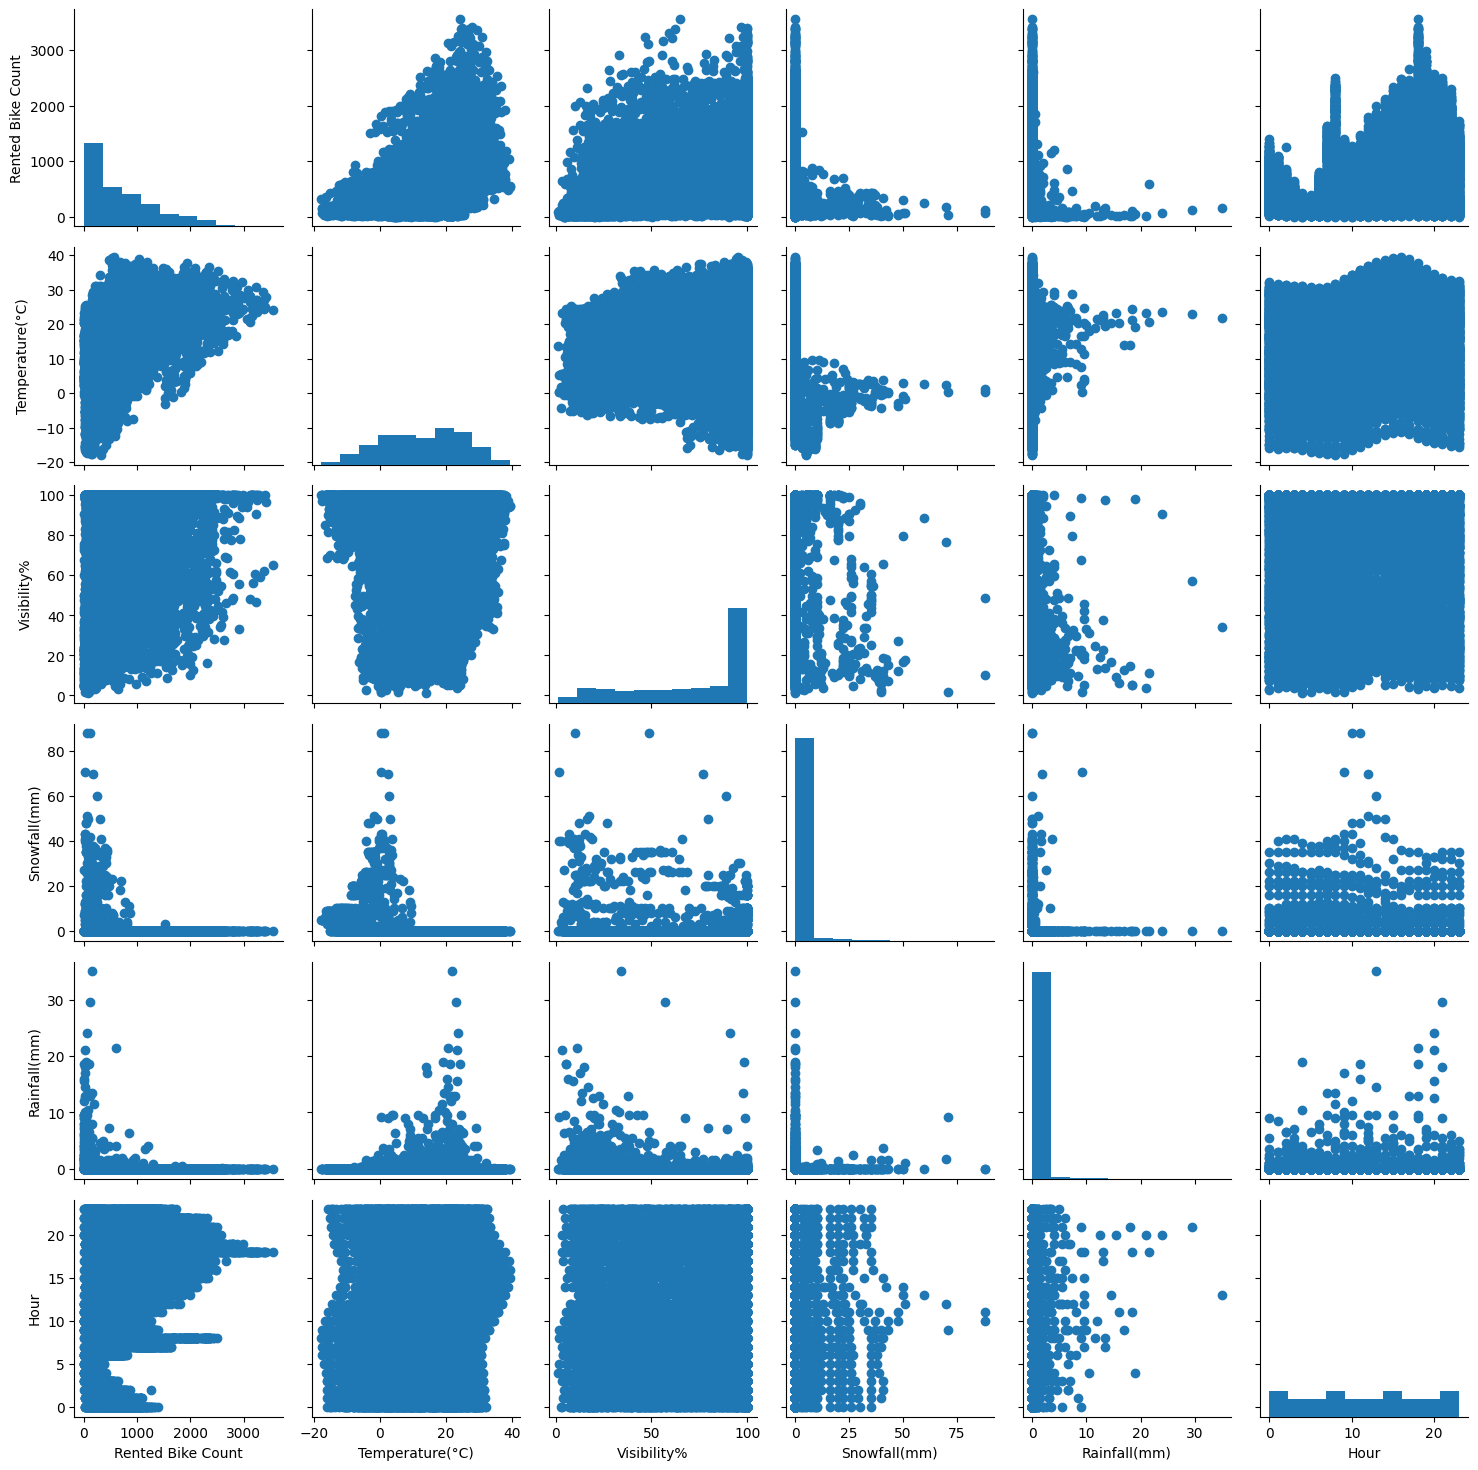

In [57]:
col_list = ['Rented Bike Count', 'Temperature(°C)', 'Visibility%', 'Snowfall(mm)', 'Rainfall(mm)','Hour']
data_subset = data[col_list]

# Now Plot pairwise data relationships for the columns in auto_subset
g = sns.PairGrid(data_subset)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

### Additional Scatterplots

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

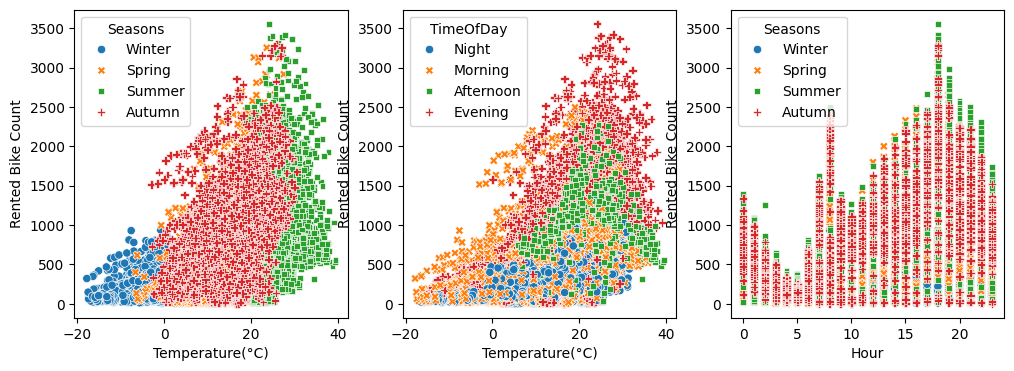

In [58]:
figure, axes = plt.subplots(1,3, figsize=(12,4))

sns.scatterplot(data=data, x=data["Temperature(°C)"], y=data["Rented Bike Count"], hue=data["Seasons"], style=data["Seasons"], ax= axes[0])
sns.scatterplot(data=data, x=data["Temperature(°C)"], y=data["Rented Bike Count"], hue=data["TimeOfDay"], style=data["TimeOfDay"], ax=axes[1])
sns.scatterplot(data=data, x=data["Hour"], y=data["Rented Bike Count"], hue=data["Seasons"], style=data["Seasons"], ax=axes[2])

# Part 5: Statistical Analysis

### Bivariate Analysis

Pearson Coefficient is: 0.5627401718632258
p-value is: 0.0


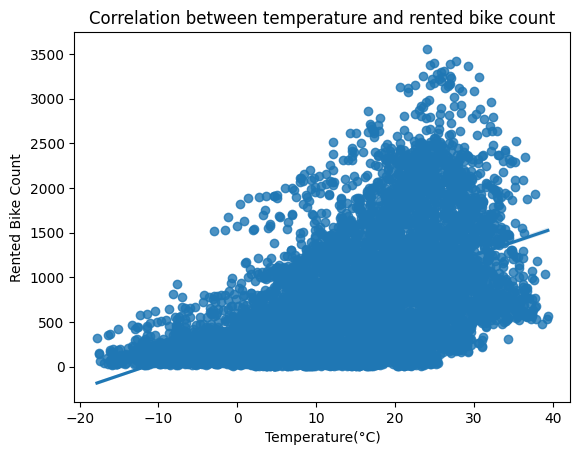

In [59]:
sns.regplot(x='Temperature(°C)', y='Rented Bike Count', data=data)
plt.title('Correlation between temperature and rented bike count')
coef, p = stats.pearsonr(data['Temperature(°C)'], data['Rented Bike Count'])
print("Pearson Coefficient is: " + str(coef))
print("p-value is: " + str(p))

Pearson Coefficient is: -0.12862609305401188
p-value is: 1.469220836081481e-32


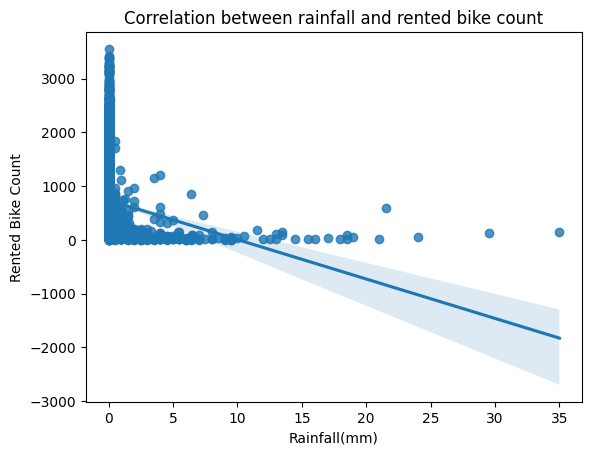

In [60]:
sns.regplot(x='Rainfall(mm)', y='Rented Bike Count', data=data)
plt.title('Correlation between rainfall and rented bike count')
coef, p = stats.pearsonr(data['Rainfall(mm)'], data['Rented Bike Count'])
print("Pearson Coefficient is: " + str(coef))
print("p-value is: " + str(p))

Pearson Coefficient is: -0.15161075292932
p-value is: 1.0490562432149224e-44


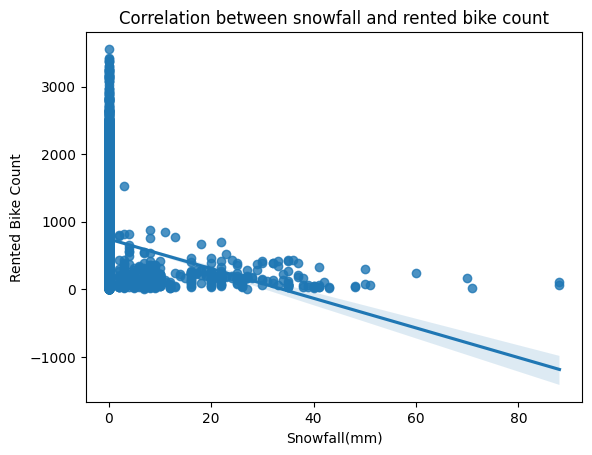

In [61]:
sns.regplot(x='Snowfall(mm)', y='Rented Bike Count', data=data)
plt.title('Correlation between snowfall and rented bike count')
coef, p = stats.pearsonr(data['Snowfall(mm)'], data['Rented Bike Count'])
print("Pearson Coefficient is: " + str(coef))
print("p-value is: " + str(p))

Pearson Coefficient is: 0.4252558821894009
p-value is: 0.0


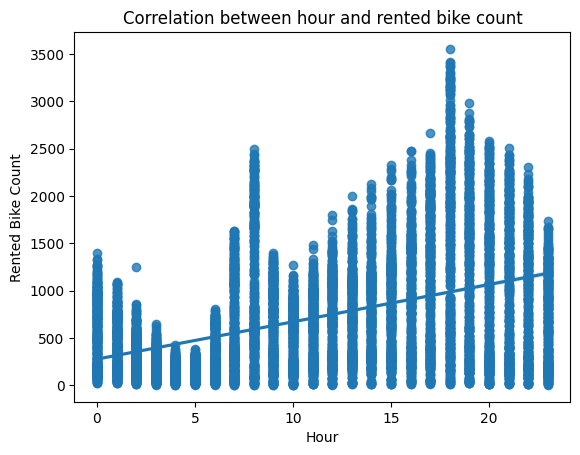

In [62]:
sns.regplot(x='Hour', y='Rented Bike Count', data=data)
plt.title('Correlation between hour and rented bike count')
coef, p = stats.pearsonr(data['Hour'], data['Rented Bike Count'])
print("Pearson Coefficient is: " + str(coef))
print("p-value is: " + str(p))

### Hypothesis Testing

### Two-Sampled Independent T-Test

In [63]:
nonHolidayCount = data[data['Holiday']==0]['Rented Bike Count']
HolidayCount = data[data['Holiday']==1]['Rented Bike Count']
stats.ttest_ind(nonHolidayCount, HolidayCount) 

TtestResult(statistic=np.float64(6.461942637055642), pvalue=np.float64(1.0907798935690005e-10), df=np.float64(8463.0))

In [64]:
NightCount = data[data['TimeOfDay']=='Night']['Rented Bike Count']
MorningCount = data[data['TimeOfDay']=='Morning']['Rented Bike Count']
AfternoonCount = data[data['TimeOfDay']=='Afternoon']['Rented Bike Count']
EveningCount = data[data['TimeOfDay']=='Evening']['Rented Bike Count']

print("Night and Morning: ")
print(stats.ttest_ind(NightCount, MorningCount))
print("")

print("Night and Afternoon: ")
print(stats.ttest_ind(NightCount, AfternoonCount))
print("")

print("Night and Evening: ")
print(stats.ttest_ind(NightCount, EveningCount))
print("")

print("Morning and Afternoon: ")
print(stats.ttest_ind(MorningCount, AfternoonCount))
print("")

print("Morning and Evening: ")
print(stats.ttest_ind(MorningCount, EveningCount))
print("")

print("Afternoon and Evening: ")
print(stats.ttest_ind(AfternoonCount, EveningCount))

Night and Morning: 
TtestResult(statistic=np.float64(-17.756444849171636), pvalue=np.float64(4.318047862506836e-68), df=np.float64(4227.0))

Night and Afternoon: 
TtestResult(statistic=np.float64(-35.1381179528115), pvalue=np.float64(3.756374765849055e-232), df=np.float64(3523.0))

Night and Evening: 
TtestResult(statistic=np.float64(-39.24233674511459), pvalue=np.float64(1.6368649073424932e-287), df=np.float64(4229.0))

Morning and Afternoon: 
TtestResult(statistic=np.float64(-16.16864256468903), pvalue=np.float64(4.180629552285939e-57), df=np.float64(4232.0))

Morning and Evening: 
TtestResult(statistic=np.float64(-28.922112937021655), pvalue=np.float64(4.7301803479736544e-170), df=np.float64(4938.0))

Afternoon and Evening: 
TtestResult(statistic=np.float64(-13.684513589349073), pvalue=np.float64(9.596749930267544e-42), df=np.float64(4234.0))


### ANOVA

In [65]:
data_grp5 = data['Rented Bike Count'].groupby(data['TimeOfDay'])
data_grp5.mean()


C:\Users\akshi\AppData\Local\Temp\ipykernel_26412\4236490764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grp5 = data['Rented Bike Count'].groupby(data['TimeOfDay'])


TimeOfDay
Night         332.896023
Morning       565.167679
Afternoon     817.128612
Evening      1112.418454
Name: Rented Bike Count, dtype: float64

In [66]:
data_grp6 = data[['TimeOfDay', 'Rented Bike Count']].groupby(data['TimeOfDay'])
f, p = stats.f_oneway(data_grp6.get_group('Night')['Rented Bike Count'], 
data_grp6.get_group('Morning')['Rented Bike Count'], 
data_grp6.get_group('Afternoon')['Rented Bike Count'],
data_grp6.get_group('Evening')['Rented Bike Count'])

print("f-value is: " + str(f))
print("p-value is: " + str(p))

f-value is: 731.6617593484837
p-value is: 0.0


C:\Users\akshi\AppData\Local\Temp\ipykernel_26412\1732445693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grp6 = data[['TimeOfDay', 'Rented Bike Count']].groupby(data['TimeOfDay'])


In [67]:
import statsmodels.stats.multicomp as mc

newData = data[(data["TimeOfDay"] == 'Night') | (data["TimeOfDay"] == 'Morning')| (data["TimeOfDay"] == 'Afternoon')| (data["TimeOfDay"] == 'Evening')]
# Use Bonferroni method to make pairwise comparsions 
comp = mc.MultiComparison(newData['Rented Bike Count'], newData['TimeOfDay'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method="bonf")
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
  group1   group2   stat   pval pval_corr reject
------------------------------------------------
Afternoon Evening -13.6845  0.0       0.0   True
Afternoon Morning  16.1686  0.0       0.0   True
Afternoon   Night  35.1381  0.0       0.0   True
  Evening Morning  28.9221  0.0       0.0   True
  Evening   Night  39.2423  0.0       0.0   True
  Morning   Night  17.7564  0.0       0.0   True
------------------------------------------------


In [68]:
newerData = data[(data["Holiday"] == 1) | (data["Holiday"] == 0)]
# Use Bonferroni method to make pairwise comparsions 
comp = mc.MultiComparison(newerData['Rented Bike Count'], newerData['Holiday'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method="bonf")
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2  stat  pval pval_corr reject
------------------------------------------
     0      1 6.4619  0.0       0.0   True
------------------------------------------


In [69]:
newestData = data[(data["Seasons"] == 'Winter') | (data["Seasons"] == 'Autumn')| (data["Seasons"] == 'Summer')| (data["Seasons"] == 'Spring')]
# Use Bonferroni method to make pairwise comparsions 
comp = mc.MultiComparison(newestData['Rented Bike Count'], newestData['Seasons'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method="bonf")
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval pval_corr reject
--------------------------------------------
Autumn Spring   9.1948  0.0       0.0   True
Autumn Summer   -5.374  0.0       0.0   True
Autumn Winter  50.9177  0.0       0.0   True
Spring Summer -14.5016  0.0       0.0   True
Spring Winter  38.0105  0.0       0.0   True
Summer Winter  53.2188  0.0       0.0   True
--------------------------------------------


### Regression

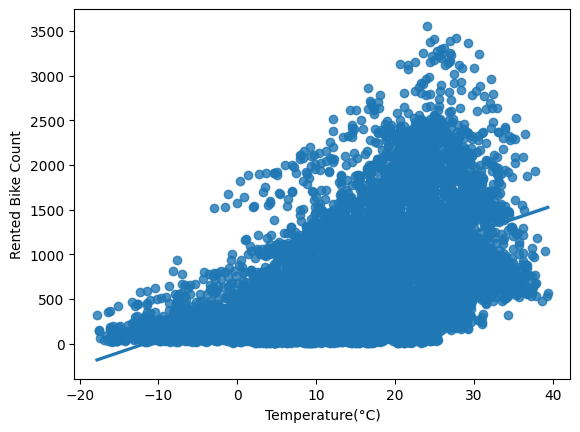

In [70]:
sns.regplot(data=data, x="Temperature(°C)", y="Rented Bike Count")
plt.show()

In [71]:
X = data['Temperature(°C)']
Y = data['Rented Bike Count']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     3922.
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:29:06   Log-Likelihood:                -65127.
No. Observations:                8465   AIC:                         1.303e+05
Df Residuals:                    8463   BIC:                         1.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             347.7708      8.390     

In [72]:
model.params

const              347.770842
Temperature(°C)     29.863319
dtype: float64

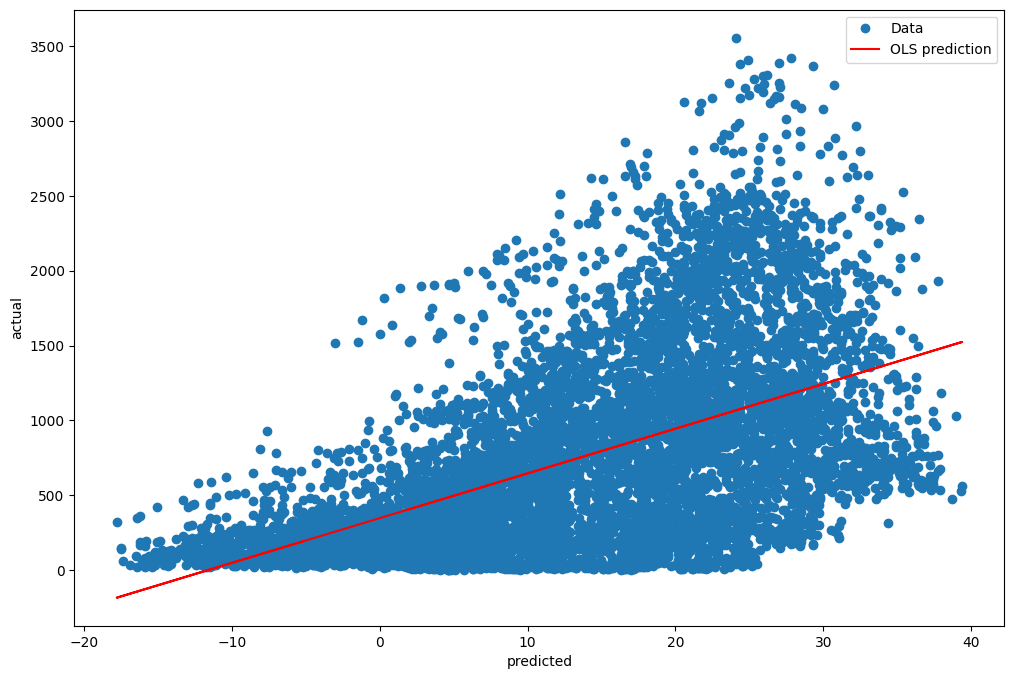

In [73]:
ypred =  model.predict(X) 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X['Temperature(°C)'], Y, 'o', label="Data")
ax.plot(X['Temperature(°C)'], model.fittedvalues, 'r', label="OLS prediction")
ax.legend(loc="best")
ax.set_ylabel("actual")
ax.set_xlabel("predicted")
plt.show()

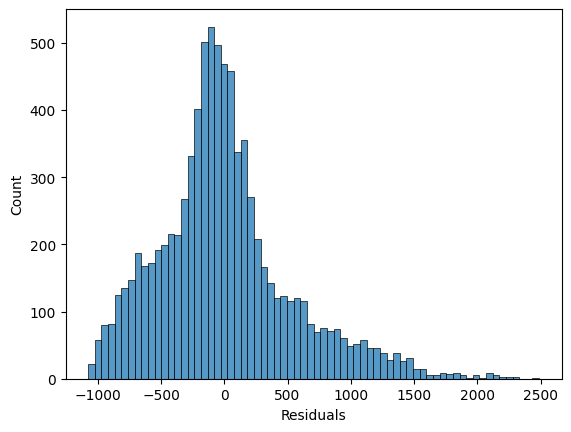

In [74]:
sns.histplot(model.resid)
plt.xlabel('Residuals')
plt.show()

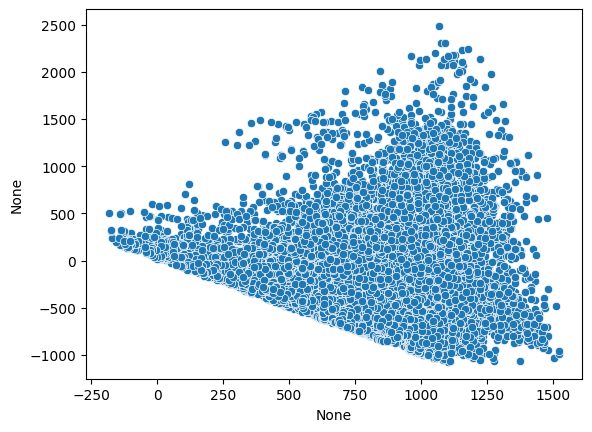

In [75]:
sns.scatterplot(x = model.fittedvalues, y = model.resid)
plt.show()

In [99]:
# Get the influence analysis results from the fitted model
influence = model.get_influence()
# show the influence analysis summary
#print(influence.summary_table())


In [77]:
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.show()

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

In [106]:
X = data['Hour']
Y = data['Rented Bike Count']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     1868.
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:31:29   Log-Likelihood:                -65894.
No. Observations:                8465   AIC:                         1.318e+05
Df Residuals:                    8463   BIC:                         1.318e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.9817     12.261     22.427      0.0

In [107]:
model.params

const    274.981683
Hour      39.469382
dtype: float64

In [108]:
X = data['Visibility%']
Y = data['Rented Bike Count']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     399.5
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           6.90e-87
Time:                        18:31:34   Log-Likelihood:                -66543.
No. Observations:                8465   AIC:                         1.331e+05
Df Residuals:                    8463   BIC:                         1.331e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         408.0675     17.453     23.381      

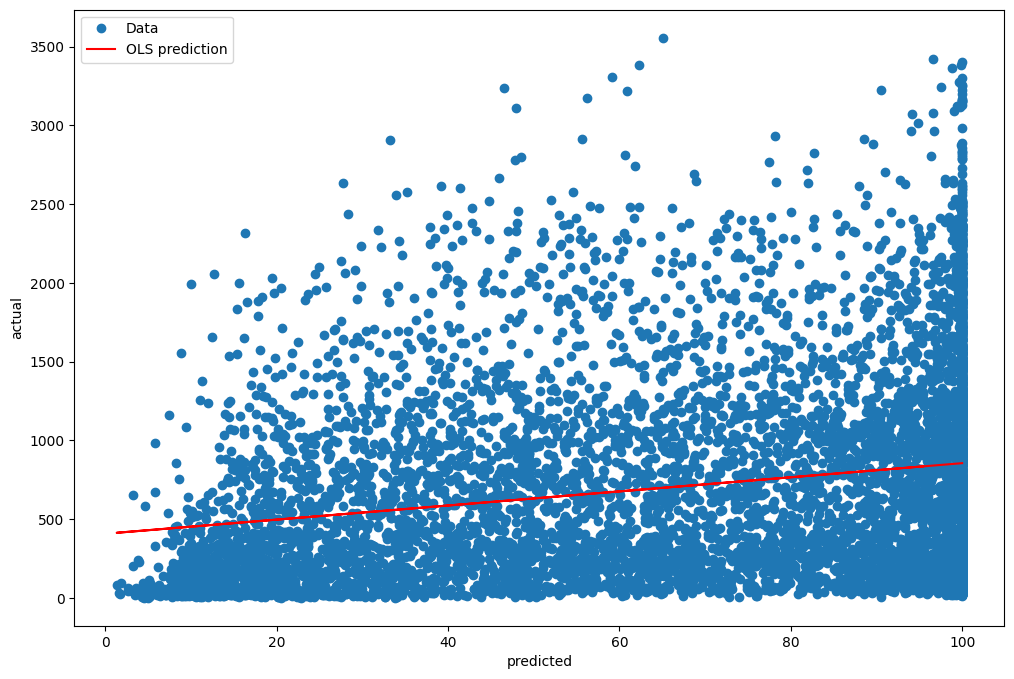

In [110]:
ypred =  model.predict(X) 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X['Visibility%'], Y, 'o', label="Data")
ax.plot(X['Visibility%'], model.fittedvalues, 'r', label="OLS prediction")
ax.legend(loc="best")
ax.set_ylabel("actual")
ax.set_xlabel("predicted")
plt.show()

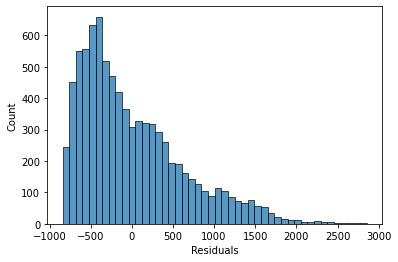

In [107]:
sns.histplot(model.resid)
plt.xlabel('Residuals')
plt.show()

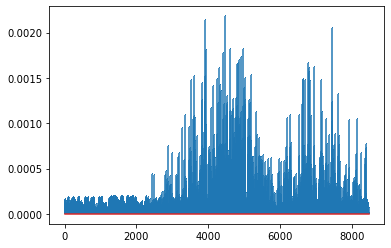

In [108]:
influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.show()

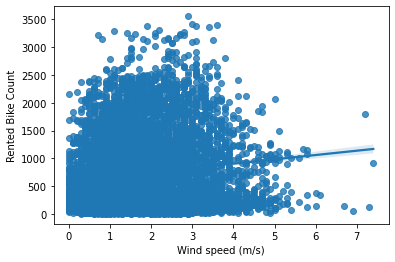

In [109]:
sns.regplot(data=data, x="Wind speed (m/s)", y="Rented Bike Count")
plt.show()

In [110]:
X = data['Wind speed (m/s)']
Y = data['Rented Bike Count']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           7.70e-31
Time:                        10:51:22   Log-Likelihood:                -66672.
No. Observations:                8465   AIC:                         1.333e+05
Df Residuals:                    8463   BIC:                         1.334e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              595.1488     13.477  

C:\Users\VahinVuppalanchi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [111]:
model.params

const               595.148759
Wind speed (m/s)     77.646188
dtype: float64

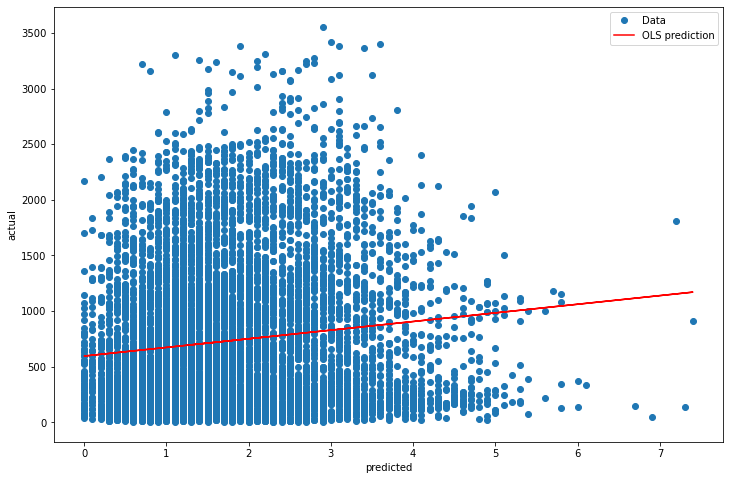

In [112]:
ypred =  model.predict(X) 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X['Wind speed (m/s)'], Y, 'o', label="Data")
ax.plot(X['Wind speed (m/s)'], model.fittedvalues, 'r', label="OLS prediction")
ax.legend(loc="best")
ax.set_ylabel("actual")
ax.set_xlabel("predicted")
plt.show()

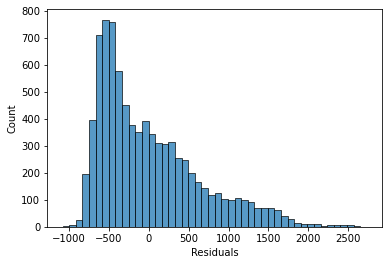

In [113]:
sns.histplot(model.resid)
plt.xlabel('Residuals')
plt.show()

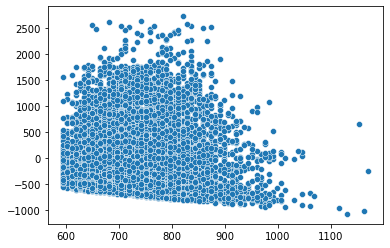

In [114]:
sns.scatterplot(x = model.fittedvalues, y = model.resid)
plt.show()

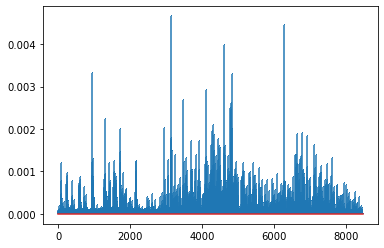

In [115]:
influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.show()

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8465 non-null   datetime64[ns]
 1   Rented Bike Count        8465 non-null   int64         
 2   Hour                     8465 non-null   int64         
 3   Temperature(°C)          8465 non-null   float64       
 4   Humidity(%)              8465 non-null   int64         
 5   Wind speed (m/s)         8465 non-null   float64       
 6   Visibility (10m)         8465 non-null   int64         
 7   Solar Radiation (MJ/m2)  8465 non-null   float64       
 8   Rainfall(mm)             8465 non-null   float64       
 9   Seasons                  8465 non-null   object        
 10  Holiday                  8465 non-null   int32         
 11  Visibility%              8465 non-null   float64       
 12  Snowfall(mm)             8465 non-

### Multiple Linear Regression

In [117]:
X_columns = ['Hour','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility%','Rainfall(mm)', 'Snowfall(mm)','Holiday','Solar Radiation (MJ/m2)','Weekend?']
X = data[X_columns]
Y = data['Rented Bike Count']
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     900.3
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:51:23   Log-Likelihood:                -63669.
No. Observations:                8465   AIC:                         1.274e+05
Df Residuals:                    8454   BIC:                         1.274e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\VahinVuppalanchi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [118]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data.select_dtypes(include = [float,int])
y = data['Rented Bike Count']
x = sm.add_constant(x)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

# Inspect VIF Values, round it to 2 decimal places
vif.round(2)

C:\Users\VahinVuppalanchi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\VahinVuppalanchi\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,54.67,const
1,2.06,Rented Bike Count
2,1.37,Hour
3,2.40,Temperature(°C)
4,2.65,Humidity(%)
5,1.28,Wind speed (m/s)
6,inf,Visibility (10m)
7,1.94,Solar Radiation (MJ/m2)
8,1.10,Rainfall(mm)
9,1.01,Holiday


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_columns = ['Hour','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility%','Rainfall(mm)', 'Snowfall(mm)','Solar Radiation (MJ/m2)']
X = data[X_columns]
Y = data['Rented Bike Count']
X = sm.add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Inspect VIF Values, round it to 2 decimal places
vif.round(2)

C:\Users\VahinVuppalanchi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIF Factor,features
0,52.93,const
1,1.18,Hour
2,1.63,Temperature(°C)
3,2.53,Humidity(%)
4,1.27,Wind speed (m/s)
5,1.56,Visibility%
6,1.07,Rainfall(mm)
7,1.09,Snowfall(mm)
8,1.91,Solar Radiation (MJ/m2)


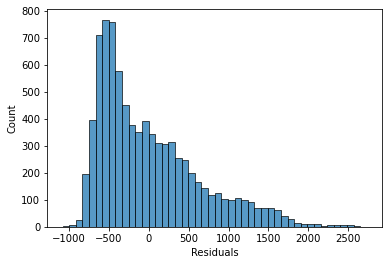

In [120]:
model.params
sns.histplot(model.resid)
plt.xlabel('Residuals')
plt.show()

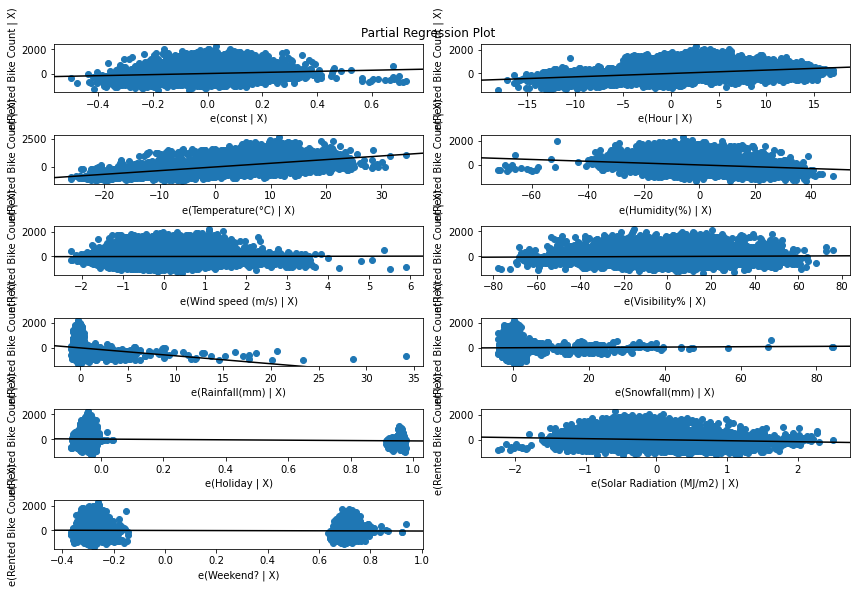

In [121]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model1, fig=fig)
plt.show()